In [1]:
# import function 
from sklearn.preprocessing import LabelEncoder
import os 
import librosa
import numpy as np
from tqdm  import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

c:\Users\yicheng\anaconda3\envs\gpu_env\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (None)/charset_normalizer (3.0.1) doesn't match a supported version!
  warnings.warn(


In [11]:
# label processing  

path = "./ravdess"
max_len = 92

for label in os.listdir(path):
    if label =="angry":
        continue
    labelDir = os.path.join(path,label)
    mfcc_vector =[]

    total = len(os.listdir(labelDir))
    print(total)
    for cnt , file  in enumerate(os.listdir(labelDir)):
        filePath = os.path.join(labelDir,file)
        for wavfile in tqdm(filePath, "Saving vectors of label - '{}' {}/{}".format(label,cnt+1,total)):
            wave , sr = librosa.load(filePath)
            wave = wave[::3]
            mfcc = librosa.feature.mfcc(y=wave,sr=16000)
            
            # 將沒有到最大長度的音檔 padding 到最大
            if max_len > mfcc.shape[1]:
                pad_width = max_len - mfcc.shape[1]
                mfcc = np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')

            else:
                mfcc = mfcc[:,:max_len]
        mfcc_vector.append(mfcc)
            
    np.save(label+".npy",mfcc_vector)


376


Saving vectors of label - 'calm' 376/376: 100%|██████████| 39/39 [00:07<00:00,  4.92it/s]


192


Saving vectors of label - 'disgust' 192/192: 100%|██████████| 42/42 [00:05<00:00,  8.18it/s]


376


Saving vectors of label - 'fearful' 376/376: 100%|██████████| 42/42 [00:07<00:00,  5.30it/s]


376


Saving vectors of label - 'happy' 376/376: 100%|██████████| 40/40 [00:05<00:00,  7.23it/s]


188


Saving vectors of label - 'neutral' 188/188: 100%|██████████| 42/42 [00:09<00:00,  4.39it/s]


376


Saving vectors of label - 'sad' 376/376: 100%|██████████| 38/38 [00:05<00:00,  6.56it/s]


192


Saving vectors of label - 'surprised' 192/192: 100%|██████████| 44/44 [00:06<00:00,  6.60it/s]


In [61]:

# data split
path = "./ravdess"
def split_train_and_test(val_ratio = 0.1 , test_ratio=0.1,random_state =  51):

    
    for cnt , label in enumerate(os.listdir(path)):
        vectorFile = label+".npy"
        print(vectorFile)
        vector_data = np.load(vectorFile)
        print(vector_data.shape)
        
        if cnt == 0 :
            X = vector_data
            Y = np.zeros(X.shape[0])
        else :
            X = np.vstack((X,vector_data))
            Y = np.append(Y,np.full(vector_data.shape[0],fill_value=(cnt)))
        

    
    print("\n")
    print("total :",X.shape,Y.shape)
    X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=test_ratio,random_state=random_state)
    #X_train, X_val, y_train, y_val =train_test_split(X_train,y_train,test_size=val_ratio/(1-test_ratio),random_state=random_state)
    print("train :" ,X_train.shape,y_train.shape)
    #print("val   :",X_val.shape,y_val.shape)
    print("test  :" ,X_test.shape,y_test.shape)
    return X_train, X_test, y_train,  y_test
    #return X_train, X_val, X_test, y_train, y_val, y_test


In [62]:
# X_train, X_val, X_test, y_train, y_val, y_test = split_train_and_test()

X_train, X_test, y_train, y_test = split_train_and_test()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_val = X_val.reshape(X_val.shape[0],X_val.shape[1], X_val.shape[2], 1)

y_train_hot = to_categorical(y_train)
# y_val_hot = to_categorical(y_val)

angry.npy
(376, 20, 92)
calm.npy
(376, 20, 92)
disgust.npy
(192, 20, 92)
fearful.npy
(376, 20, 92)
happy.npy
(376, 20, 92)
neutral.npy
(188, 20, 92)
sad.npy
(376, 20, 92)
surprised.npy
(192, 20, 92)


total : (2452, 20, 92) (2452,)
train : (2206, 20, 92) (2206,)
test  : (246, 20, 92) (246,)


In [53]:
model = Sequential([
    Conv2D(256,kernel_size=(2,2),padding="same",activation="relu",input_shape=(20,92,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,kernel_size=(2,2),padding="same",activation="relu"),
    Conv2D(128,kernel_size=(2,2),padding="same",activation="relu"),
    #MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,kernel_size=(2,2),padding="same",activation="relu"),
    Conv2D(32,kernel_size=(2,2),padding="same",activation="relu"),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(8,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 20, 92, 256)       1280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 46, 256)      0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 46, 128)       131200    
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 46, 128)       65664     
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 46, 32)        16416     
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 46, 32)        4128      
                                                      

In [63]:

early_stop_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor = 'val_accuracy'),
]
train=model.fit(X_train, y_train_hot, batch_size=64, epochs=100,validation_split=0.2, verbose=1,callbacks=early_stop_callbacks)


Epoch 1/100
28/28 [==============================] - 12s 409ms/step - loss: 0.2303 - accuracy: 0.9478 - val_loss: 0.2087 - val_accuracy: 0.9480
Epoch 2/100
28/28 [==============================] - 11s 397ms/step - loss: 0.0599 - accuracy: 0.9841 - val_loss: 0.2285 - val_accuracy: 0.9593
Epoch 3/100
28/28 [==============================] - 11s 407ms/step - loss: 0.0234 - accuracy: 0.9949 - val_loss: 0.2223 - val_accuracy: 0.9615
Epoch 4/100
28/28 [==============================] - 12s 423ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.2270 - val_accuracy: 0.9593
Epoch 5/100
 5/28 [====>.........................] - ETA: 9s - loss: 5.5990e-04 - accuracy: 1.0000 

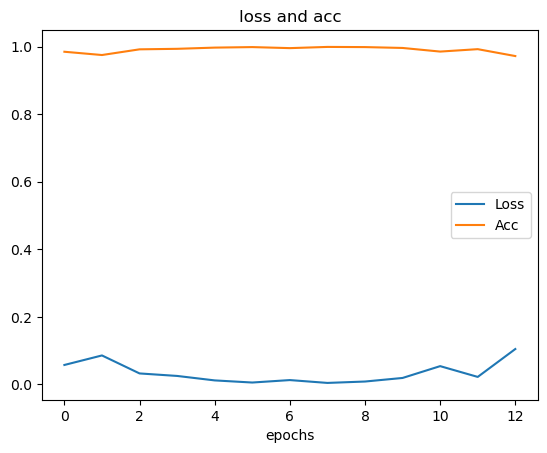

In [58]:
'''儲存訓練過程中 的 loss and acc'''
loss = train.history['loss']
acc = train.history['accuracy']
    
'''圖形印出loss and acc '''
plt.title('loss and acc')
plt.plot(loss)
plt.plot(acc)
plt.legend(['Loss', 'Acc'])
plt.xlabel('epochs')
plt.show()

# 模型存檔
model.save('ASR.h5')  # creates a HDF5 file 'model.h5'

In [46]:
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder

In [60]:

model = load_model("ASR.h5")
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
res = model.predict(X_test)
labelencoder = LabelEncoder()
y_test = labelencoder.fit_transform(y_test)
correct = 0
for i in range(len(res)) : 
    correct += (np.argmax(res[i])==y_test[i])
print(f"acc :{correct/len(res) *100}%")

8/8 [==============================] - 0s 50ms/step
acc :69.51219512195121%
